In [1]:
import pandas as pd

In [2]:
# Read in the data
df = pd.read_csv('../Data/data.csv',
                 parse_dates=['Date', 'Date of Birth']
                 )

In [3]:
# show first 5 rows
print(df.head())
# show last 5 rows
print(df.tail())

   Rank             Time             Name Country Date of Birth  Place  \
0     1  00:01:40.910000    David Rudisha     KEN    1988-12-17    1.0   
1     2  00:01:41.010000    David Rudisha     KEN    1988-12-17    1.0   
2     3  00:01:41.090000    David Rudisha     KEN    1988-12-17    1.0   
3     4  00:01:41.110000  Wilson Kipketer     DEN    1970-12-12    1.0   
4     5  00:01:41.240000  Wilson Kipketer     DEN    1970-12-12    1.0   

     City       Date Gender  Event  
0  London 2012-09-08    Men  800 m  
1   Rieti 2010-08-29    Men  800 m  
2  Berlin 2010-08-22    Men  800 m  
3    Köln 1997-08-24    Men  800 m  
4  Zürich 1997-08-13    Men  800 m  
       Rank             Time                    Name Country Date of Birth  \
18239  1000  00:03:33.250000      Noureddine Morceli     ALG    1970-02-28   
18240  1000  00:03:33.250000              Paul Korir     KEN    1977-07-15   
18241  1000  00:03:33.250000  Hudson Santos de Souza     BRA    1977-02-25   
18242  1000  00:03:33

In [4]:
# show the shape of the Data
print(df.shape)
# show the columns
print(df.columns)
# show the data types
print(df.dtypes)

(18244, 10)
Index(['Rank', 'Time', 'Name', 'Country', 'Date of Birth', 'Place', 'City',
       'Date', 'Gender', 'Event'],
      dtype='object')
Rank                      int64
Time                     object
Name                     object
Country                  object
Date of Birth    datetime64[ns]
Place                   float64
City                     object
Date             datetime64[ns]
Gender                   object
Event                    object
dtype: object


In [5]:
#convert the column Time and it to Time_s (time in seconds)
df['Time_s'] = pd.to_timedelta(df['Time']).dt.total_seconds().astype(float)
pd.set_option('display.float_format', '{:.3f}'.format)
print(df['Time_s'].head())

0   100.910
1   101.010
2   101.090
3   101.110
4   101.240
Name: Time_s, dtype: float64


In [6]:
# sanity check (ages should be between 12 and 50)
# Date (of the event) - Date of Birth (of the participant) = Age (of the participant)
# then convert the age to years (from days)
df['Age'] = df['Date'] - df['Date of Birth']
df['Age'] = df['Age'].dt.days/365
print(df['Age'].head())
# describe
print(df['Age'].describe())



0   23.742
1   21.712
2   21.693
3   26.718
4   26.688
Name: Age, dtype: float64
count   18244.000
mean       26.031
std         4.143
min        11.551
25%        22.958
50%        25.701
75%        28.693
max       115.756
Name: Age, dtype: float64


In [7]:
df = df.query('12 <= Age <= 50')
print(df['Age'].describe())


count   18241.000
mean       26.024
std         4.078
min        15.140
25%        22.959
50%        25.701
75%        28.693
max        43.247
Name: Age, dtype: float64


In [8]:
print(df.loc[df['Age'].idxmin()]) #youngest https://en.wikipedia.org/wiki/Lydia_Cheromei


Rank                             731
Time                 00:31:41.090000
Name                  Lydia Cheromei
Country                          KEN
Date of Birth    1977-05-11 00:00:00
Place                          2.000
City              Belle vue Mauricia
Date             1992-06-27 00:00:00
Gender                         Women
Event                       10,000 m
Time_s                      1901.090
Age                           15.140
Name: 16970, dtype: object


In [9]:
print(df.loc[df['Age'].idxmax()]) #oldest https://en.wikipedia.org/wiki/Jo_Pavey


Rank                             568
Time                 00:31:33.440000
Name                    Joanne Pavey
Country                          GBR
Date of Birth    1973-09-20 00:00:00
Place                         15.000
City                  Rio de Janeiro
Date             2016-12-08 00:00:00
Gender                         Women
Event                       10,000 m
Time_s                      1893.440
Age                           43.247
Name: 16807, dtype: object


In [10]:
# save the data
df.to_csv('../Data/data_clean.csv', index=False, sep=';', encoding='utf-8', date_format='%Y-%m-%d')

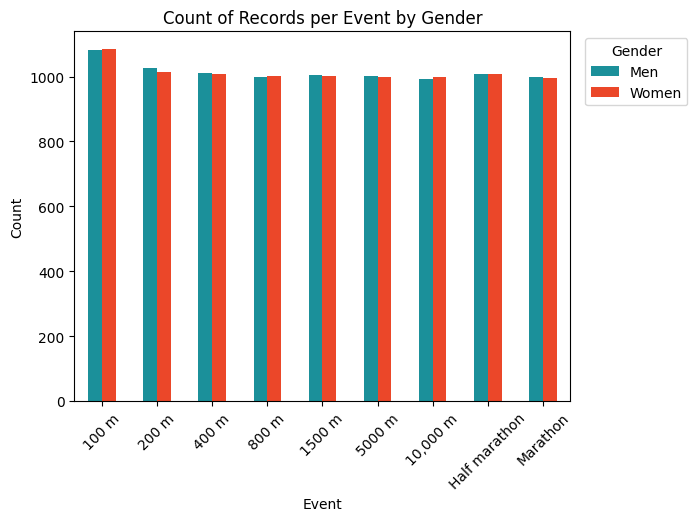

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

sorted_df = df.groupby(['Event', 'Gender']).size().reset_index(name='Count')

# Custom order for the events
event_order = ['100 m', '200 m', '400 m', '800 m', '1500 m',
               '5000 m', '10,000 m', 'Half marathon', 'Marathon']

# Sort the DataFrame by this custom order
sorted_df['Event'] = pd.Categorical(
    sorted_df['Event'], categories=event_order, ordered=True)
sorted_df = sorted_df.sort_values('Event')

# Pivot the DataFrame to have genders as separate columns
pivoted_df = sorted_df.pivot(index='Event', columns='Gender', values='Count')

# Creating the figure and axes
fig, ax = plt.subplots()

# Custom colors
colors = ['#1b909a', '#eb4729'] # blue, orange -> man, woman

# Plotting using the axes object with custom colors
pivoted_df.plot(kind='bar', ax=ax, stacked=False, color=colors)

# Setting titles and labels
ax.set_title('Count of Records per Event by Gender')
ax.set_xlabel('Event')
ax.set_ylabel('Count')
ax.set_xticklabels(pivoted_df.index, rotation=45)
ax.legend(title='Gender')
ax.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.25, 1))


# Display the plot
plt.show()